In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

In [155]:
# Run src/data/combine_annotations.py first to generate the combined annotations file

### Set frame names in lower case

In [4]:
frames = ["Economic","Capacity and resources","Morality","Fairness and equality","Legality, constitutionality and jurisprudence","Policy prescription and evaluation","Crime and punishment","Security and defense","Health and safety","Quality of life","Cultural identity","Public opinion","Political","External regulation and reputation","Other"]
frames = [f.lower() for f in frames]

### Get path of the directory vision and text (model) annotated files are stored

In [21]:
analysis_path = Path('/projects/frame_align/data/annotated/analysis')
text_analysis_path = analysis_path / 'text'
vision_analysis_path = analysis_path / 'vision'

### Combine the vision and text annotated files into a single file

In [2]:
combined_df = pd.read_csv('/projects/frame_align/data/annotated/consolidated/combined_annotations.csv')

print(combined_df.shape)

uuids = combined_df['text_id'].unique()
len(uuids)


(385803, 31)


385803

### Filter the data to get rows which have required frames (in both vision and text)

In [5]:
combined_df['text_frame_name'] = combined_df['text_frame_name'].str.lower()
combined_df['vision_frame-name'] = combined_df['vision_frame-name'].str.lower()

text_valid = combined_df['text_frame_name'].isin(frames)
vision_valid = combined_df['vision_frame-name'].isin(frames)
intersection = text_valid & vision_valid
combined_df = combined_df[intersection]
print(combined_df.shape)

(357032, 31)


### Filter original news data to get rows (with uuids) which have been annotated

In [12]:
annotated_articles = []
data_dir = Path('/projects/frame_align/data/raw/2023-2024/')
for month_dir in data_dir.iterdir():
    if not month_dir.is_dir():
        continue
    df = pd.read_csv(month_dir/"datawithtopiclabels.csv")
    df = df[df['id'].isin(uuids)]
    annotated_articles.append(df)
annotated_articles = pd.concat(annotated_articles)
annotated_articles['month'].value_counts()
# annotated_articles.to_csv(analysis_path.parent.parent / "srishti-analysis"/'annotated_articles.csv', index=False)

month
2023-09-01_2023-09-30    59951
2023-08-01_2023-08-31    57655
2023-07-01_2023-07-31    56513
2023-05-01_2023-05-31    53356
2023-06-01_2023-06-30    41030
2023-10-01_2023-10-31    35278
2023-12-01_2023-12-31    19887
2023-11-01_2023-11-30    18284
2024-01-01_2024-01-31    17615
2024-02-01_2024-02-29    13529
2024-03-01_2024-03-31     6432
2024-04-01_2024-04-30     6273
Name: count, dtype: int64

### Save the filtered data to a new file

In [161]:
# annotated_articles.to_csv(analysis_path/'_srishti_annotated_articles.csv', index=False)

In [162]:
# annotated_articles = pd.read_csv(analysis_path/'_srishti_annotated_articles.csv')

View first few line

In [163]:
annotated_articles.head(2)

,topic,auto_topic_label,id,authors,date_download,date_modify,date_publish,description,filename,image_url,language,localpath,maintext,source_domain,title,title_page,title_rss,url,month,topic_label
0,-1,police_new_man_woman_says_year_school_old_arre...,6ad27c9b-8223-4127-a3d9-a4b376c7c389,['Joel B. Pollak'],2023-11-29 06:09:44+00:00,NaN,2023-11-29 05:00:13,"Negotiators in Doha, Qatar, over the release o...",https%3A%2F%2Fwww.breitbart.com%2Fmiddle-east%...,https://media.breitbart.com/media/2023/11/Hama...,en,NaN,"Negotiators in Doha, Qatar, over the release o...",www.breitbart.com,Report: Negotiators in Qatar Have Divided Host...,NaN,NaN,https://www.breitbart.com/middle-east/2023/11/...,2023-11-01_2023-11-30,Crime
1,-1,police_new_man_woman_says_year_school_old_arre...,69781249-7365-455b-8422-ecc943fe6cef,['Ian Hanchett'],2023-11-22 00:40:00+00:00,NaN,2023-11-21 22:59:25,"On Tuesday's broadcast of MSNBC's ""Morning Joe...",https%3A%2F%2Fwww.breitbart.com%2Fclips%2F2023...,https://media.breitbart.com/media/2023/04/Gett...,en,NaN,On Tuesday’s broadcast of MSNBC’s “Morning Joe...,www.breitbart.com,We Can't 'Abandon Ukraine' But We Will if GOP ...,NaN,NaN,https://www.breitbart.com/clips/2023/11/21/dem...,2023-11-01_2023-11-30,Crime


View columns in original news data and filtered data

In [164]:
print(combined_df.columns)
print("*"*50)
print(annotated_articles.columns)

Index(['text_topic', 'text_topic_justification', 'text_summary',
       'text_entity_name', 'text_justification_entity_sentiment',
       'text_entity_sentiment', 'text_frame_justification', 'text_frame_id',
       'text_frame_name', 'text_tone', 'text_justification_tone',
       'text_issue_frame', 'text_issue_frame_justification', 'text_id',
       'vision_caption', 'vision_main-actor', 'vision_sentiment',
       'vision_sentiment-justification', 'vision_facial-expression',
       'vision_facial-expression-justification', 'vision_perceivable-gender',
       'vision_perceivable-gender-justification', 'vision_symbolic-object',
       'vision_symbolic-meaning', 'vision_symbolic-meaning-explanation',
       'vision_frame-id', 'vision_frame-name', 'vision_frame-justification',
       'vision_image_url', 'vision_title', 'vision_uuid'],
      dtype='object')
**************************************************
Index(['topic', 'auto_topic_label', 'id', 'authors', 'date_download',
       'date_

### Find all common column
- Sanity check to ensure no duplication of columns when merging the data
- There should be no common columns between the two dataframes

In [15]:
# find common columns , exclude 'id' column
common_col = list(set(annotated_articles.columns) & set(combined_df.columns))
common_col


[]

In [16]:
# Drop common columns from annotated_articles and merge with combined_df
annotated_articles_df = annotated_articles.drop(columns=common_col)

# Merge on 'text_id' (uuid for text data) and 'id' (uuid for annotated articles)
merged_combined_df = combined_df.merge(annotated_articles_df, left_on='text_id', right_on='id', how='left')

# make text_id as first column for better readability
merged_combined_df = merged_combined_df[['text_id'] + [col for col in merged_combined_df.columns if col != 'text_id']]
merged_combined_df.head(2)

,text_id,text_topic,text_topic_justification,text_summary,text_entity_name,text_justification_entity_sentiment,text_entity_sentiment,text_frame_justification,text_frame_id,text_frame_name,...,language,localpath,maintext,source_domain,title,title_page,title_rss,url,month,topic_label
0,703da9bd-c953-4982-ad01-a359e44b1ab5,Politics,"The article discusses political events, candid...","Kari Lake, a GOP Senate candidate in Arizona, ...",Kari Lake,Lake's attacks on John McCain and his supporte...,negative,The article discusses the political career of ...,13,political,...,en,NaN,Kari Lake may not be Senate material. But the ...,www.msnbc.com,Meghan McCain buries Kari Lake for backpedalin...,NaN,NaN,https://www.msnbc.com/the-reidout/reidout-blog...,2024-02-01_2024-02-29,no_topic
1,557145db-e3fc-4f6c-803d-4cb8fe5dd95b,Israel-Gaza Conflict,The article discusses the discovery of tunnels...,Israel Defense Forces (IDF) have discovered a ...,UNRWA,The article portrays UNRWA in a negative light...,negative,The article discusses the discovery of a netwo...,8,security and defense,...,en,NaN,The Israel Defense Forces (IDF) have discovere...,dailycaller.com,Hamas Tunnel Network Discovered Under UN Agenc...,NaN,NaN,https://dailycaller.com/2024/02/10/hamas-tunne...,2024-02-01_2024-02-29,no_topic


View all column in the merged data (filtred news merged to their annotated data)

In [167]:
merged_combined_df.shape

(357032, 51)

In [168]:
print(f" No. of topics: {len(merged_combined_df['topic_label'].unique())}")
print(f"Topics: {merged_combined_df['topic_label'].unique()}")

 No. of topics: 60
Topics: ['no_topic' 'Crime' 'News' 'Weather' 'Sports' 'Health' 'Natural Disasters'
 'Technology' 'Entertainment' 'Business' 'Politics' 'Food' 'Finance'
 'Science' 'Media' 'Society' 'Real Estate' 'Transportation' 'Education'
 'Lifestyle' 'Immigration' 'Accidents' 'Law' 'Environment' 'Economy'
 'Lottery' 'Culture' 'Automotive' 'Travel' 'Charity' 'Royalty' 'Pets'
 'Obituary' 'Religion' 'Military' 'Consumer' 'Social Issues'
 'Miscellaneous' 'Celebrity' 'Traffic' 'Psychology'
 'International Relations' 'Odd News' 'Aviation' 'Relationships'
 'Infrastructure' 'Fashion' 'Conflict' 'Family' 'Gambling' 'Advertising'
 'Labor' 'Energy' 'History' 'Wildlife' 'Insurance' 'Demographics' 'Nature'
 'Shopping' 'Terrorism']


### Count number of articles per news source

In [169]:
merged_combined_df['source_domain'].value_counts()

source_domain
www.cbsnews.com                    112792
www.bbc.com                         51034
www.forbes.com                      28729
apnews.com                          25229
nypost.com                          17532
www.theguardian.com                 17251
www.foxnews.com                     16243
www.breitbart.com                   10495
www.axios.com                        9628
dailycaller.com                      8468
www.nbcnews.com                      7370
www.newsweek.com                     7261
www.huffpost.com                     7142
www.usatoday.com                     4474
www.reuters.com                      4389
www.newsmax.com                      4244
www.insider.com                      4238
www.washingtontimes.com              2939
www.foxbusiness.com                  2421
thehill.com                          2409
www.politico.com                     2400
time.com                             2304
www.oann.com                         1791
www.msnbc.com       

In [170]:
merged_combined_df.columns

Index(['text_id', 'text_topic', 'text_topic_justification', 'text_summary',
       'text_entity_name', 'text_justification_entity_sentiment',
       'text_entity_sentiment', 'text_frame_justification', 'text_frame_id',
       'text_frame_name', 'text_tone', 'text_justification_tone',
       'text_issue_frame', 'text_issue_frame_justification', 'vision_caption',
       'vision_main-actor', 'vision_sentiment',
       'vision_sentiment-justification', 'vision_facial-expression',
       'vision_facial-expression-justification', 'vision_perceivable-gender',
       'vision_perceivable-gender-justification', 'vision_symbolic-object',
       'vision_symbolic-meaning', 'vision_symbolic-meaning-explanation',
       'vision_frame-id', 'vision_frame-name', 'vision_frame-justification',
       'vision_image_url', 'vision_title', 'vision_uuid', 'topic',
       'auto_topic_label', 'id', 'authors', 'date_download', 'date_modify',
       'date_publish', 'description', 'filename', 'image_url', 'language

### Combine all image uuids and save the image size into a single pkl file
- format:dict
- dict = {uuid: [path, count]}


In [171]:
# image_paths = ["/projects/frame_align/data/ img_data", "/projects/frame_align/data/news_img_data"]

# # make a list of paths to .png/.jpg files in the image directories as dict where 
# # key =  image path.split('/')[-1].strip('.png') and value = image path
# image_dict = {}

# for idx, image_path in enumerate(image_paths):
#     for img in Path(image_path).rglob('*.png') or Path(image_path).rglob('*.jpg'):
#         image_dict[img.name.split('.')[0]] = img

In [172]:
# # save as pickle
# import pickle
# with open(analysis_path.parent.parent / "srishti-analysis"/'image_dict.pkl', 'wb') as f:
#     pickle.dump(image_dict, f)

In [173]:
# from tqdm import tqdm
# from pathlib import Path

# img_path1 = Path("/projects/frame_align/data/img_data/")
# downloaded_img_1= {}
# for dir in img_path1.iterdir():
#     downloaded_img_dir = dir/"correct_downloaded_imgs/"
#     for img in tqdm(downloaded_img_dir.iterdir()):
#         # path and size
#         downloaded_img_1[img.name.split('.')[0]] = [img, img.stat().st_size]


#     print(f"dir: {dir}, len: {len(downloaded_img_1)}")

In [174]:
# for key, value in downloaded_img_1.items():
#     print(key, value)
#     break

In [175]:
# img_path2 = Path("/projects/frame_align/data/news_img_data/")
# downloaded_img_2= {}
# for dir in img_path2.iterdir():
#     # .pkl files are not dir
#     if '.pkl' in str(dir):
#         continue
#     for img in tqdm(dir.iterdir()):
#         downloaded_img_2[img.name.split('.')[0]] = [img, img.stat().st_size]


In [176]:
# for key, value in downloaded_img_2.items():
#     print(key, value)
#     break

In [177]:
# import pandas as pd
# downloaded_images = {**downloaded_img_1, **downloaded_img_2}

# # save as pickle
# import pickle
# with open(analysis_path.parent.parent / "srishti-analysis"/'downloaded_images.pkl', 'wb') as f:
#     pickle.dump(downloaded_images, f)
#     print("saved")


Read pickle file

In [8]:
import pickle

with open(Path("/projects/frame_align/data/srishti-analysis/downloaded_images.pkl"), 'rb') as f:
    downloaded_images = pickle.load(f)

In [10]:
for key, value in downloaded_images.items():
    print(key, value[1])
    break

978803d9-e5e7-4002-95a4-f6d245903eb8 52506


top percentile: 0.98, bottom percentile: 0.01
Pre filtering:  962380 Post filtering:  926456 Difference:  35924


Text(0.5, 1.0, 'Histogram of Image Sizes')

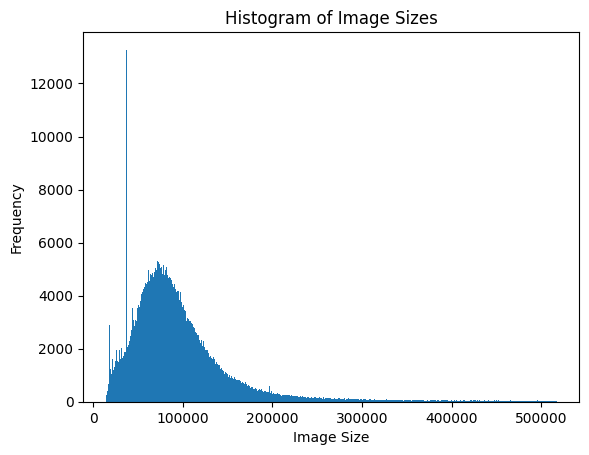

In [55]:
# # plot histogram of image sizes
# filter top % and bottom % of images before plot
top_percentile = 0.98
bottom_percentile = 0.01

# 978803d9-e5e7-4002-95a4-f6d245903eb8 [PosixPath('/projects/frame_align/data/img_data/2023-11-01_2023-11-30/correct_downloaded_imgs/978803d9-e5e7-4002-95a4-f6d245903eb8.jpg'), 52506]
quantile_top = pd.Series([v[1] for v in downloaded_images.values()]).quantile(top_percentile)
quantile_bottom = pd.Series([v[1] for v in downloaded_images.values()]).quantile(bottom_percentile)
filtered_images = {k: v for k, v in downloaded_images.items() if v[1] > quantile_bottom and v[1] < quantile_top}
print(f"top percentile: {top_percentile}, bottom percentile: {bottom_percentile}")
print("Pre filtering: ", len(downloaded_images), "Post filtering: ", len(filtered_images), "Difference: ", len(downloaded_images) - len(filtered_images))

plt.hist([v[1] for v in filtered_images.values()], bins=1000)
plt.xlabel('Image Size')
plt.ylabel('Frequency')
plt.title('Histogram of Image Sizes')


In [56]:
downloaded_img_uuids = set(downloaded_images.keys())
filtered_img_uuids = set(filtered_images.keys())

In [57]:
# print min and max size of images
print(f" Before filtering: min size: {min(v[1] for v in downloaded_images.values())}, max size: {max(v[1] for v in downloaded_images.values())}, median size: {pd.Series([v[1] for v in downloaded_images.values()]).median()}")
print(f" After filtering: min size: {min(v[1] for v in filtered_images.values())}, max size: {max(v[1] for v in filtered_images.values())}, median size: {pd.Series([v[1] for v in filtered_images.values()]).median()}")

 Before filtering: min size: 954, max size: 11540663, median size: 83814.0
 After filtering: min size: 13666, max size: 517416, median size: 83667.5


In [58]:
removed_images = downloaded_img_uuids - filtered_img_uuids
len(removed_images)

35924

 Plot random 3 image samples from each 20k 

Plotting 0 to 3 samples
Plotting 5000 to 5003 samples
Plotting 10000 to 10003 samples
Plotting 15000 to 15003 samples
Plotting 20000 to 20003 samples
Plotting 25000 to 25003 samples
Plotting 30000 to 30003 samples
Plotting 35000 to 35003 samples


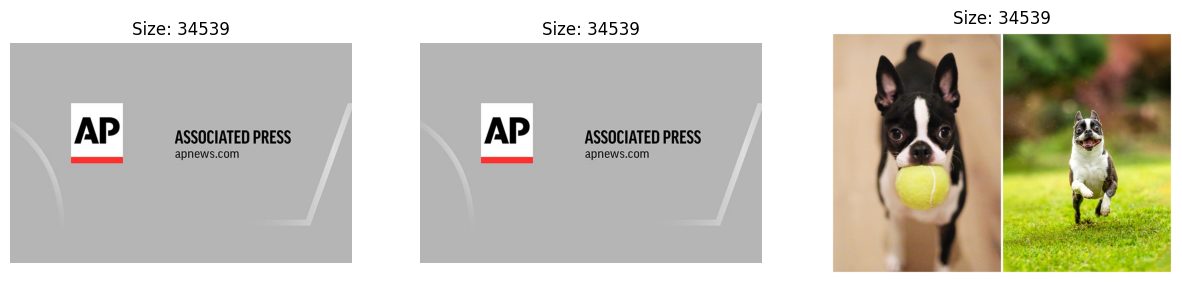

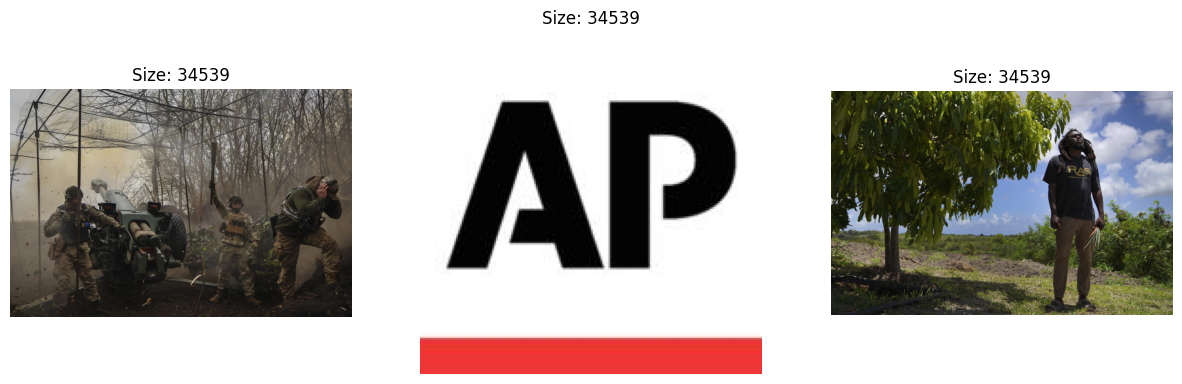

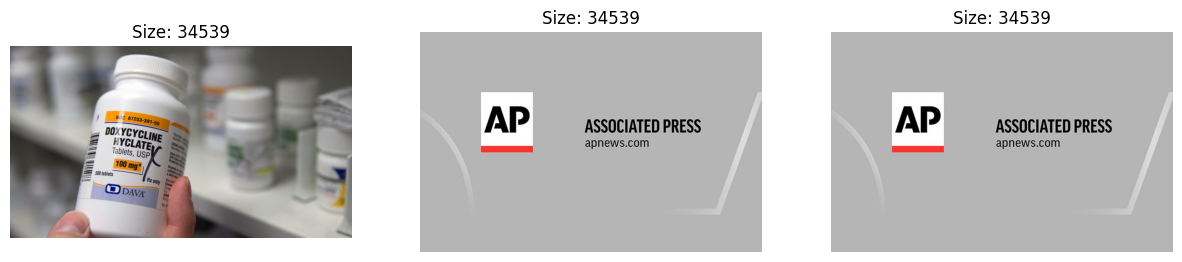

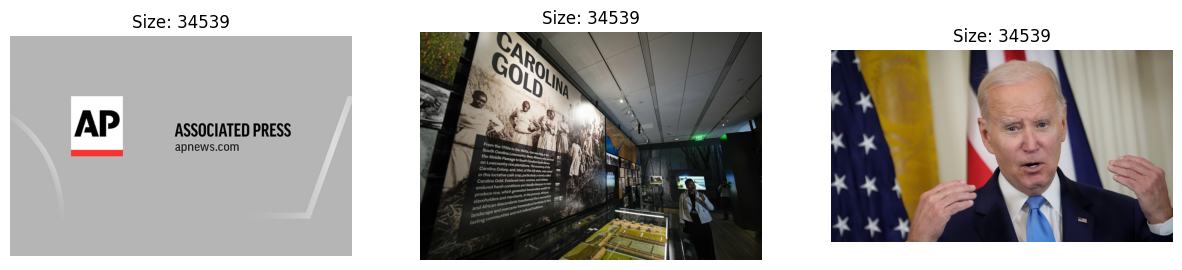

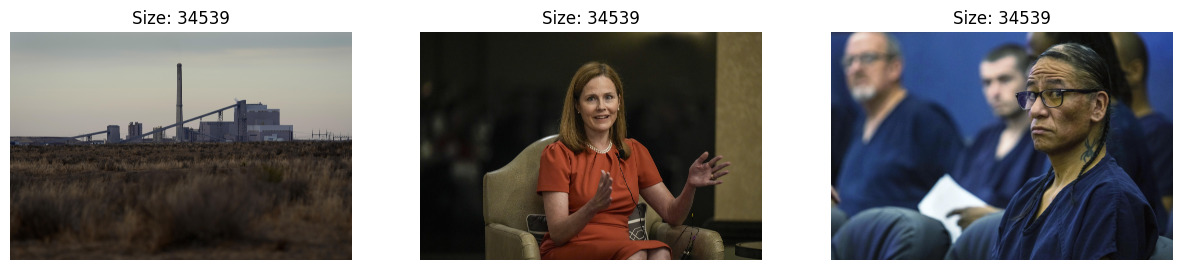

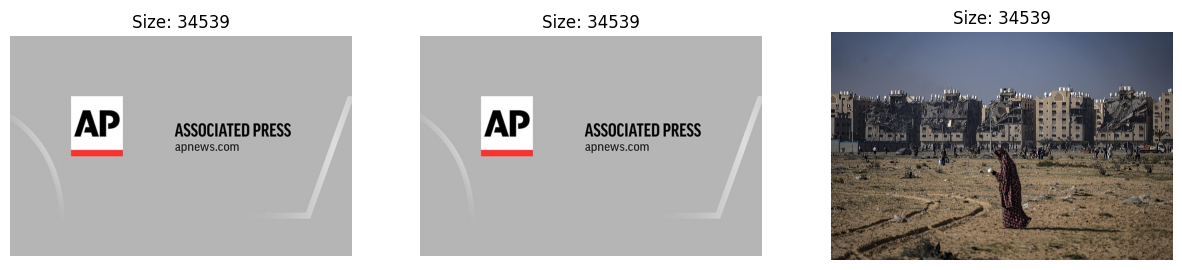

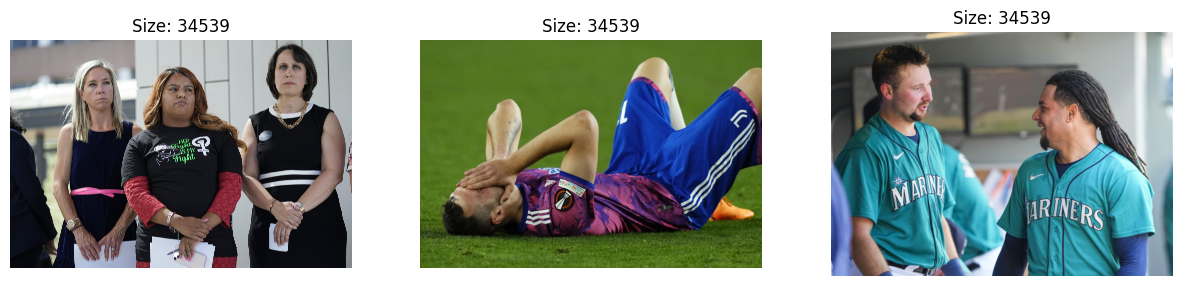

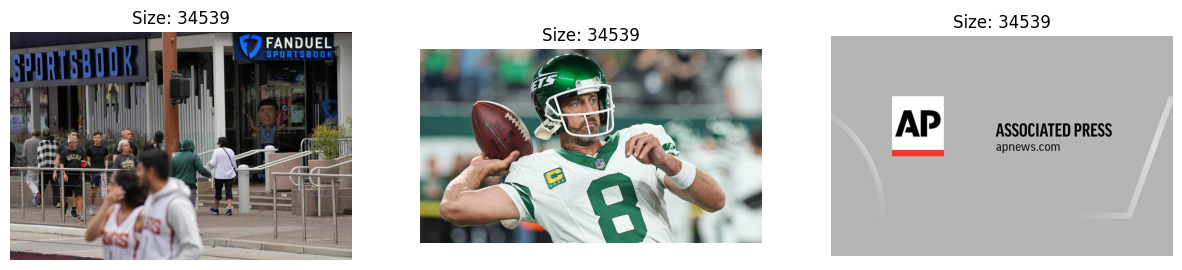

In [64]:
### Plot random 3 samples from each 20k filtered images
import random

random.seed(42)
# for every 20k samples in the dict, plot 3 random samples
for i in range(0, len(removed_images), 5000):
    # print(f"Plotting {i} to {i+3} samples")
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for j, img_uuid in enumerate(random.sample(list(removed_images), 3)):
        img = plt.imread(downloaded_images[img_uuid][0])
        ax[j].imshow(img)
        ax[j].set_title(f"Size: {value[1]}")
        ax[j].axis('off')
 

----------------------------------------------------------------

### Save filtered image uuids to pickle file

In [71]:
# # save as pickle
import pickle

with open(analysis_path.parent.parent / "sample"/'filtered_images.pkl', 'wb') as f:
    pickle.dump(filtered_images, f)
    print(f"Saved filtered images: {len(filtered_images)} at {analysis_path.parent.parent / 'srishti-analysis'/'filtered_images.pkl'}")



Saved filtered images: 926456 at /projects/frame_align/data/srishti-analysis/filtered_images.pkl


### Filter length texts

In [17]:
merged_combined_df['maintext'] = merged_combined_df['maintext'].astype(str)
merged_combined_df['text_length'] = merged_combined_df['maintext'].apply(lambda x: len(x))

lower_quantile = merged_combined_df['text_length'].quantile(0.01)
upper_quantile = merged_combined_df['text_length'].quantile(0.99)

filtered_text_df = merged_combined_df[(merged_combined_df['text_length'] >= lower_quantile) & (merged_combined_df['text_length'] <= upper_quantile)]

print("Pre filtering: ", merged_combined_df.shape, "Post filtering: ", filtered_text_df.shape, "Difference: ", merged_combined_df.shape[0] - filtered_text_df.shape[0])

Pre filtering:  (357032, 52) Post filtering:  (353462, 52) Difference:  3570


Save filtered text uuids to pickle file

In [65]:
with open(analysis_path.parent.parent / "sample"/'filtered_texts.pkl', 'wb') as f:
    pickle.dump(filtered_text_df, f)

In [186]:
# left_hosts = ['alternet.org', 'editor.cnn.com', 'democracynow.org', 'dailybeast.com', 'huffpost.com', 'theintercept.com','jacobin.com', 'motherjones.com', 'newyorker.com', 'slate.com',   'msnbc.com', 'vox.com']
# left_lean_hosts = ['abcnews.com','apnews.com', 'theatlantic.com', 'bloomberg.com', 'cbsnews.com', 'insider.com', 'nbcnews.com', 'thenytimes.com', 'npr.com', 'politico.com', 'propublica.org', 'time.com', 'washingtonpost.com', 'yahoonews.com','usatoday.com', 'theguardian.com']
# center_hosts = ['axios.com', 'bbc.com', 'forbes.com', 'newsweek.com', 'reuters.com', 'realclearpolitics.com', 'thehill.com']
# right_lean_hosts = ['thedispatch.com', 'theepochtimes.com', 'foxbusiness.com', 'ijr.com', 'nypost.com', 'thepostmillennial.com', 'washingtonexaminer.com', 'washingtontimes.com']
# right_hosts = ['theamericanconservative.com', 'theamericanspectator.com', 'breitbart.com', 'dailycaller.com', 'dailywire.com', 'dailymail.com', 'foxnews.com', 'newsmax.com', 'oann.com', 'thefederalist.com']


In [60]:
filtered_images_uuid = list(filtered_images.keys())
len(filtered_images_uuid)

926456

Filter text data for all uuids which all uuid in filytered image data

In [61]:
# filter 'vision_uuid' column of merged_combined_df based on filtered_images_uuid
filtered_text_image_df = filtered_text_df[filtered_text_df['vision_uuid'].isin(filtered_images_uuid)]
filtered_text_image_df.shape

(341805, 52)

#### Save filtered-text-vision data to pickle file

In [66]:
with open(analysis_path.parent.parent / "sample"/'filtered_text_image_df.pkl', 'wb') as f:
    pickle.dump(filtered_text_image_df, f)
    print(f"Saved filtered text image df: {len(filtered_text_image_df)} at {analysis_path.parent.parent / 'srishti-analysis'/'filtered_text_image_df.pkl'}")

Saved filtered text image df: 341805 at /projects/frame_align/data/srishti-analysis/filtered_text_image_df.pkl


### Count the frames per text/vision news

In [67]:
# for each month, get unique frame. for each frame, gte 2000 articles

months = filtered_text_image_df['month'].unique()
for month in months:
    month_df = filtered_text_image_df[filtered_text_image_df['month'] == month]
    vision_frame_counts = month_df['text_frame_name'].value_counts()
    text_frame_counts = month_df['vision_frame-name'].value_counts()
    print(f"Month frame count: {month} - vision: {len(vision_frame_counts)}, text: {len(text_frame_counts)}")

Month frame count: 2024-02-01_2024-02-29 - vision: 15, text: 11
Month frame count: 2023-12-01_2023-12-31 - vision: 15, text: 12
Month frame count: 2024-04-01_2024-04-30 - vision: 15, text: 12
Month frame count: 2024-01-01_2024-01-31 - vision: 15, text: 12
Month frame count: 2023-09-01_2023-09-30 - vision: 15, text: 13
Month frame count: 2023-07-01_2023-07-31 - vision: 15, text: 12
Month frame count: 2023-11-01_2023-11-30 - vision: 15, text: 12
Month frame count: 2023-05-01_2023-05-31 - vision: 15, text: 12
Month frame count: 2023-06-01_2023-06-30 - vision: 15, text: 12
Month frame count: 2024-03-01_2024-03-31 - vision: 14, text: 13


Month frame count: 2023-10-01_2023-10-31 - vision: 15, text: 12
Month frame count: 2023-08-01_2023-08-31 - vision: 15, text: 13


### Sample 13 articles/frame/month

In [68]:
# for each month, per text frame, get 2000 unique articles
sampled_df = pd.DataFrame()
for month in months:
    for frame in frames:
        month_df = filtered_text_image_df[(filtered_text_image_df['month'] == month) & (filtered_text_image_df['text_frame_name'] == frame)]
        if month_df.shape[0] >=18:
            month_df = month_df.sample(n=18, random_state=1)
        sampled_df = pd.concat([sampled_df, month_df])

Save as csv file

In [69]:
sampled_df.to_csv(analysis_path.parent.parent / "sample"/'sampled_annotated_articles.csv', index=False)

In [72]:
len(sampled_df)

3129

Visualize the data per frame/month

In [25]:
frame_counts_pivot = sampled_df.pivot_table(index='month', columns='text_frame_name', values='text_id', aggfunc='count', fill_value=0)
frame_counts_pivot



text_frame_name,capacity and resources,crime and punishment,cultural identity,economic,external regulation and reputation,fairness and equality,health and safety,"legality, constitutionality and jurisprudence",morality,other,policy prescription and evaluation,political,public opinion,quality of life,security and defense
month,,,,,,,,,,,,,,,
2023-05-01_2023-05-31,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
2023-06-01_2023-06-30,18,18,18,18,14,18,18,18,18,18,18,18,18,18,18
2023-07-01_2023-07-31,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
2023-08-01_2023-08-31,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
2023-09-01_2023-09-30,18,18,18,18,18,18,18,18,18,18,18,18,18,18,18
2023-10-01_2023-10-31,18,18,18,18,17,18,18,18,18,18,18,18,18,18,18
2023-11-01_2023-11-30,18,18,18,18,4,18,18,18,18,18,18,18,18,18,18
2023-12-01_2023-12-31,18,18,18,18,5,18,18,18,18,18,18,18,18,18,18
2024-01-01_2024-01-31,18,18,18,18,4,18,18,18,18,18,18,18,18,18,18


### Calculate the left out data and see their distribution

/tmp/ipykernel_80387/2724480068.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_out_df['text_length'] = left_out_df['maintext'].apply(lambda x: len(x))
/tmp/ipykernel_80387/2724480068.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  left_out_df['image_size'] = left_out_df['vision_uuid'].apply(lambda x: downloaded_images[x][1])


Text Length: min: 3, max: 99999, median: 3533.0
Image Size: min: 954, max: 11084296, median: 214174.0


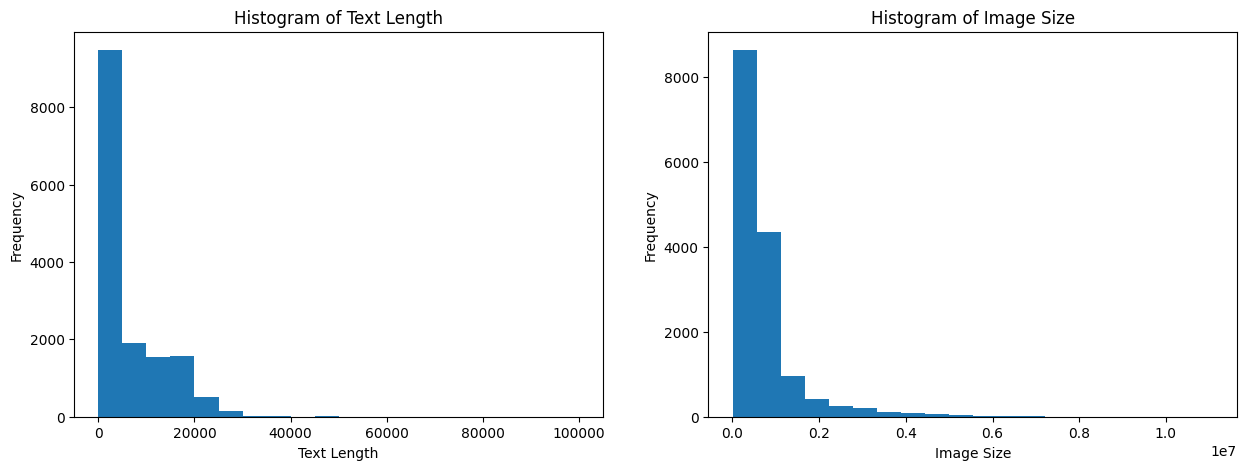

In [70]:
# remaining data also need rthe histogram of text length and image size

left_out_df = merged_combined_df[~merged_combined_df['text_id'].isin(filtered_text_image_df['text_id'])]


# save left out data as pickle
# with open(analysis_path.parent.parent / "srishti-analysis"/'left_out_df.pkl', 'wb') as f:
#     pickle.dump(left_out_df, f)
#     print(f"Saved left out df: {len(left_out_df)} at {analysis_path.parent.parent / 'srishti-analysis'/'left_out_df.pkl'}")

left_out_df['text_length'] = left_out_df['maintext'].apply(lambda x: len(x))
left_out_df['image_size'] = left_out_df['vision_uuid'].apply(lambda x: downloaded_images[x][1])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].hist(left_out_df['text_length'], bins=20)
ax[0].set_xlabel('Text Length')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Text Length')

ax[1].hist(left_out_df['image_size'], bins=20)
ax[1].set_xlabel('Image Size')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Image Size')

print(f"Text Length: min: {left_out_df['text_length'].min()}, max: {left_out_df['text_length'].max()}, median: {left_out_df['text_length'].median()}")
print(f"Image Size: min: {left_out_df['image_size'].min()}, max: {left_out_df['image_size'].max()}, median: {left_out_df['image_size'].median()}")